In [1]:
# BiocManager::install(c('xx','yy','zz'))

In [39]:
suppressMessages(library('DESeq2'))
library('vsn')
library('pheatmap')
library('genefilter')
library('gplots')

# 0. User defined variables

In [3]:
inputFile='/Volumes/omics4tb2/alomana/projects/uwm/results/transcriptomics/joined_data.txt'
results_dir='/Volumes/omics4tb2/alomana/projects/uwm/results/transcriptomics/'

# 1. Read data

In [4]:
cts=as.matrix(read.table(inputFile,header=TRUE,sep="\t",row.names=1))
head(cts)

,HMDM.1,HMDM.2,THP1.1,THP1.2,iMac.1,iMac.2
ENSG00000223972,0,0,0,0,0,0
ENSG00000227232,81,47,72,126,41,42
ENSG00000278267,2,0,3,9,1,5
ENSG00000243485,1,0,0,0,2,2
ENSG00000237613,0,0,0,0,0,0
ENSG00000268020,0,0,0,0,0,0


# 2. Define metadata

In [5]:
sampleIDs=c('HMDM.1','HMDM.2','THP1.1','THP1.2','iMac.1','iMac.2')
cellType=c('human','human','thp','thp','imac','imac')
metadata=as.matrix(data.frame(sampleName=sampleIDs,condition=cellType))
metadata

sampleName,condition
HMDM.1,human
HMDM.2,human
THP1.1,thp
THP1.2,thp
iMac.1,imac
iMac.2,imac


# 3. Differential expression analysis

## 3.1. Filtering

In [6]:
dds=DESeqDataSetFromMatrix(countData=cts,colData=metadata,design=~condition)
dds

class: DESeqDataSet 
dim: 57500 6 
metadata(1): version
assays(1): counts
rownames(57500): ENSG00000223972 ENSG00000227232 ... ENSG00000277475
  ENSG00000268674
rowData names(0):
colnames(6): HMDM.1 HMDM.2 ... iMac.1 iMac.2
colData names(2): sampleName condition

[1] "double"

ENSG00000223972 ENSG00000227232 ENSG00000278267 ENSG00000243485 ENSG00000237613 
           -Inf        8.675957        4.321928        2.321928            -Inf 
ENSG00000268020 
           -Inf

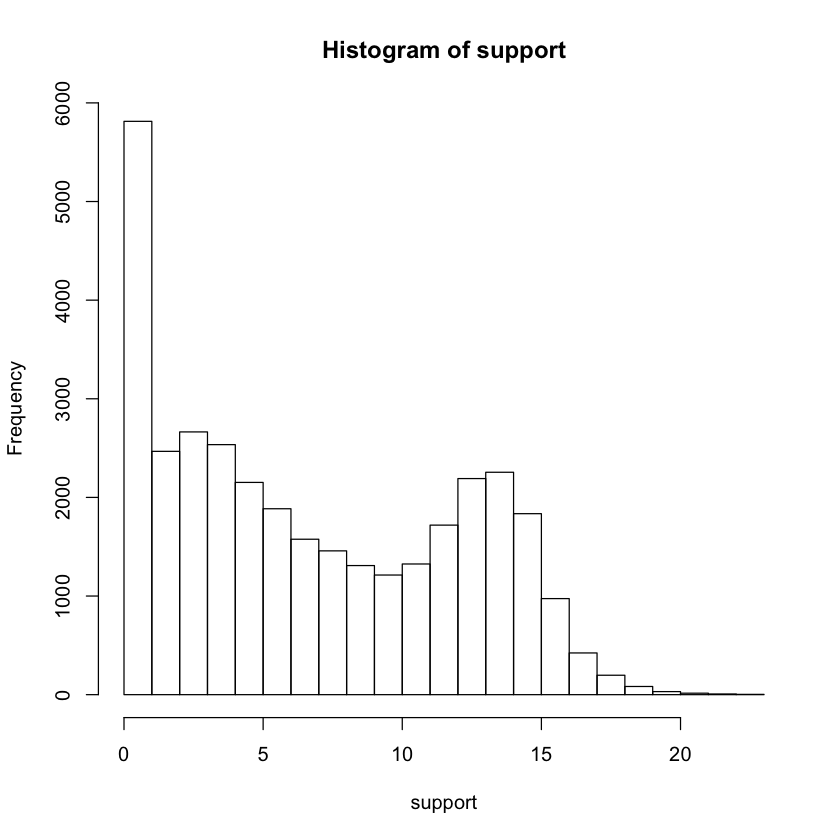

In [7]:
support=log2(rowSums(counts(dds)))
type(support)
head(support)
hist(support)

In [8]:
keep=rowSums(counts(dds)) >= 10
ddsA=dds[keep,]
ddsA

class: DESeqDataSet 
dim: 22734 6 
metadata(1): version
assays(1): counts
rownames(22734): ENSG00000227232 ENSG00000278267 ... ENSG00000275063
  ENSG00000271254
rowData names(0):
colnames(6): HMDM.1 HMDM.2 ... iMac.1 iMac.2
colData names(2): sampleName condition

[1] "double"

ENSG00000227232 ENSG00000278267 ENSG00000238009 ENSG00000233750 ENSG00000268903 
       8.675957        4.321928        5.321928        3.459432        7.044394 
ENSG00000269981 
       6.426265

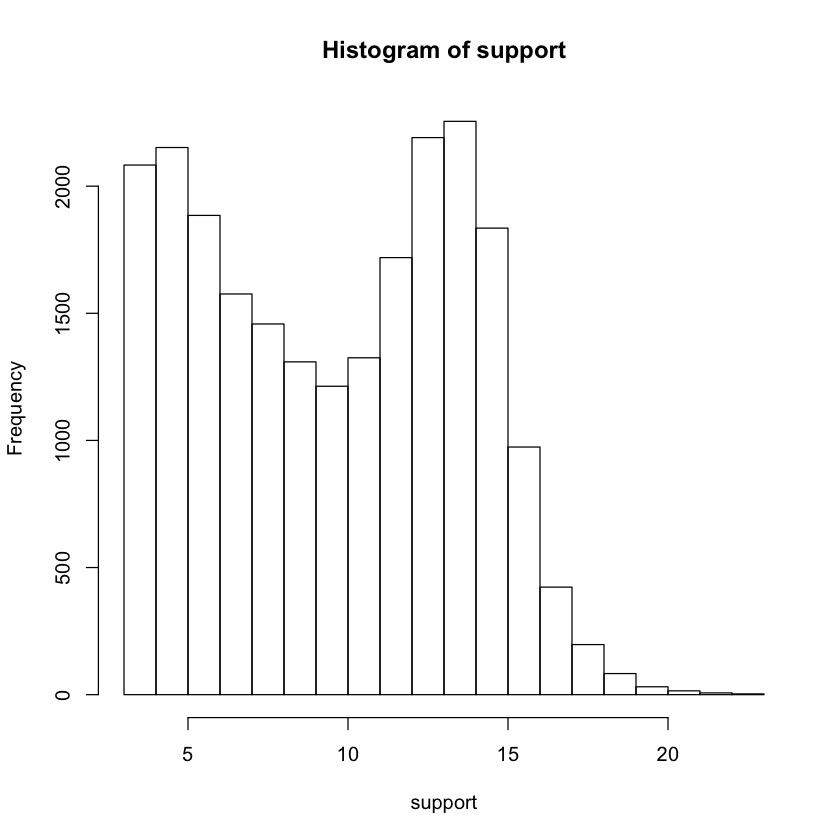

In [9]:
support=log2(rowSums(counts(ddsA)))
type(support)
head(support)
hist(support)

In [10]:
keep=rowSums(counts(ddsA)) >= 2**10
ddsB=ddsA[keep,]
ddsB

class: DESeqDataSet 
dim: 11060 6 
metadata(1): version
assays(1): counts
rownames(11060): ENSG00000225630 ENSG00000237973 ... ENSG00000276345
  ENSG00000271254
rowData names(0):
colnames(6): HMDM.1 HMDM.2 ... iMac.1 iMac.2
colData names(2): sampleName condition

[1] "double"

ENSG00000225630 ENSG00000237973 ENSG00000248527 ENSG00000228794 ENSG00000188976 
       15.04495        14.12848        16.28211        11.65642        14.27380 
ENSG00000187608 
       13.05070

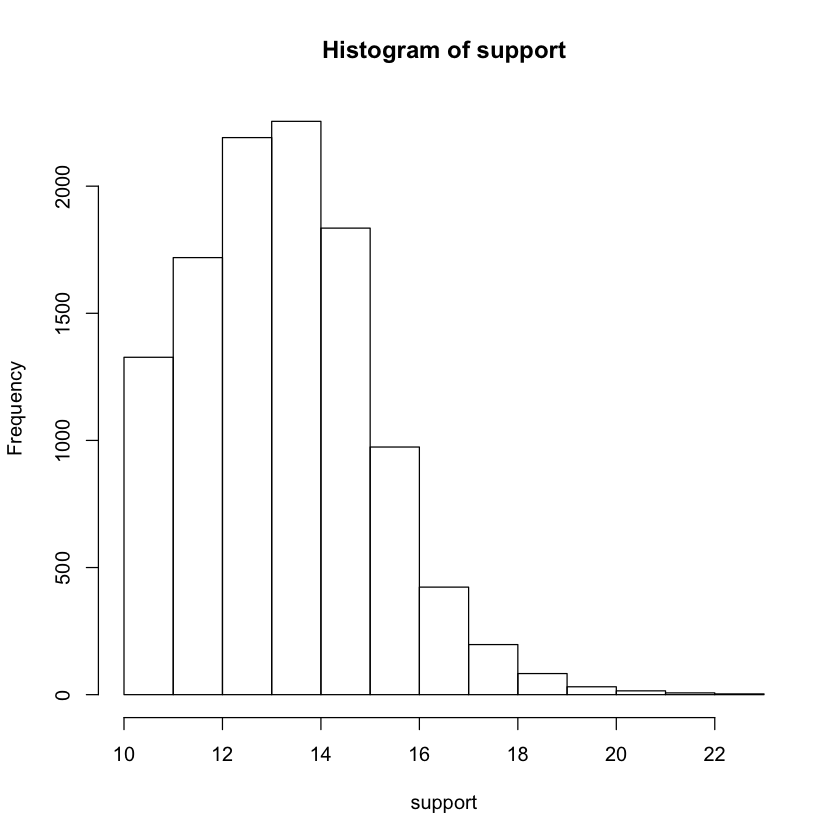

In [11]:
support=log2(rowSums(counts(ddsB)))
type(support)
head(support)
hist(support)

## 3.2. Call model testing

In [12]:
ddsA=DESeq(ddsA)
ddsB=DESeq(ddsB)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [13]:
resTHP_A=results(ddsA,contrast=c("condition","thp","human"),alpha=0.05)
summary(resTHP_A)
head(resTHP_A)

resIMAC_A=results(ddsA,contrast=c("condition","imac","human"),alpha=0.05)
summary(resIMAC_A)
head(resIMAC_A)


out of 22734 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 4434, 20%
LFC < 0 (down)     : 4073, 18%
outliers [1]       : 0, 0%
low counts [2]     : 3526, 16%
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



log2 fold change (MLE): condition thp vs human 
Wald test p-value: condition thp vs human 
DataFrame with 6 rows and 6 columns
                        baseMean    log2FoldChange             lfcSE
                       <numeric>         <numeric>         <numeric>
ENSG00000227232 64.8040645538724 0.311497470058614 0.591225789654669
ENSG00000278267 3.09151956536799  2.33076410181149  2.30610341255875
ENSG00000238009 6.86385238754326 -5.42190463851124  1.96556228936471
ENSG00000233750 1.90691218616581 0.718243194016596   3.2004462054256
ENSG00000268903 22.8986933143083 -1.33098228537622  1.08106577174441
ENSG00000269981 15.4545462296714 -4.27857811807946  1.92800396482528
                             stat              pvalue               padj
                        <numeric>           <numeric>          <numeric>
ENSG00000227232  0.52686718933651   0.598285820155737  0.716138470340338
ENSG00000278267  1.01069366148909   0.312163071716182                 NA
ENSG00000238009 -2.7584496649


out of 22734 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 2482, 11%
LFC < 0 (down)     : 1872, 8.2%
outliers [1]       : 0, 0%
low counts [2]     : 3967, 17%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



log2 fold change (MLE): condition imac vs human 
Wald test p-value: condition imac vs human 
DataFrame with 6 rows and 6 columns
                        baseMean     log2FoldChange             lfcSE
                       <numeric>          <numeric>         <numeric>
ENSG00000227232 64.8040645538724 -0.524421306366906 0.603523552941038
ENSG00000278267 3.09151956536799   1.71327279489685   2.3453614646199
ENSG00000238009 6.86385238754326  -2.66019899480722  1.49686978639963
ENSG00000233750 1.90691218616581   3.08501537215329   3.0824424983515
ENSG00000268903 22.8986933143083   1.50947321306985  1.03018313679582
ENSG00000269981 15.4545462296714   2.24615544465133  1.31156273927041
                              stat            pvalue              padj
                         <numeric>         <numeric>         <numeric>
ENSG00000227232 -0.868932627088606 0.384883982421652 0.606220536979199
ENSG00000278267  0.730494135228964 0.465088196543266                NA
ENSG00000238009  -1.7771746

In [14]:
resTHP_B=results(ddsB,contrast=c("condition","thp","human"),alpha=0.05)
summary(resTHP_B)
head(resTHP_B)

resIMAC_B=results(ddsB,contrast=c("condition","imac","human"),alpha=0.05)
summary(resIMAC_B)
head(resIMAC_B)


out of 11060 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 3060, 28%
LFC < 0 (down)     : 2976, 27%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 151)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



log2 fold change (MLE): condition thp vs human 
Wald test p-value: condition thp vs human 
DataFrame with 6 rows and 6 columns
                        baseMean     log2FoldChange             lfcSE
                       <numeric>          <numeric>         <numeric>
ENSG00000225630 5013.34401436683   5.80070362784848 0.366315359164749
ENSG00000237973 3176.40837768097 -0.683846461687746 0.252096435933912
ENSG00000248527 13873.2194674214 -0.568772778992194 0.308117791051666
ENSG00000228794 523.562385573306  0.606697341160172 0.278877074976099
ENSG00000188976 3166.76664880964  0.917422462781094 0.252258257073108
ENSG00000187608 1432.80761537317 -0.195559896576059 0.332585121038169
                              stat               pvalue                 padj
                         <numeric>            <numeric>            <numeric>
ENSG00000225630   15.8352727580817 1.77686992029712e-56   2.090657587073e-54
ENSG00000237973  -2.71263835664467  0.00667499096582362   0.0142961657788554
ENSG0


out of 11060 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 1656, 15%
LFC < 0 (down)     : 1427, 13%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 151)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



log2 fold change (MLE): condition imac vs human 
Wald test p-value: condition imac vs human 
DataFrame with 6 rows and 6 columns
                        baseMean     log2FoldChange             lfcSE
                       <numeric>          <numeric>         <numeric>
ENSG00000225630 5013.34401436683   2.04268494776536 0.367783294803294
ENSG00000237973 3176.40837768097   2.02760375389638  0.25072304233493
ENSG00000248527 13873.2194674214   1.23443534055791 0.307986633870259
ENSG00000228794 523.562385573306  0.405799739021956 0.280145659503694
ENSG00000188976 3166.76664880964 0.0260516614771852 0.252802185788346
ENSG00000187608 1432.80761537317  0.792441559142824 0.332137512302974
                             stat               pvalue                 padj
                        <numeric>            <numeric>            <numeric>
ENSG00000225630  5.55404494067048 2.79133667154914e-08 4.38940509357477e-07
ENSG00000237973  8.08702596703416 6.11392356267297e-16 2.31575323983435e-14
ENSG000

## 3.3. Visualization and ranking

In [15]:
resultsNames(ddsA)
resultsNames(ddsB)

[1] "Intercept"               "condition_imac_vs_human"
[3] "condition_thp_vs_human"

[1] "Intercept"               "condition_imac_vs_human"
[3] "condition_thp_vs_human"

In [16]:
resLFC_A_imac=lfcShrink(ddsA,coef="condition_imac_vs_human",type="apeglm",lfcThreshold=1)
head(resLFC_A_imac,n=20)
sum(resLFC_A_imac$svalue < 0.05,na.rm=TRUE)

resLFC_A_thp=lfcShrink(ddsA,coef="condition_thp_vs_human",type="apeglm",lfcThreshold=1)
head(resLFC_A_thp,n=20)
sum(resLFC_A_thp$svalue < 0.05,na.rm=TRUE)

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

computing FSOS 'false sign or small' s-values (T=1)



log2 fold change (MAP): condition imac vs human 
 
DataFrame with 20 rows and 4 columns
                        baseMean     log2FoldChange             lfcSE
                       <numeric>          <numeric>         <numeric>
ENSG00000227232 64.8040645538724 -0.375342198279007 0.522576527811538
ENSG00000278267 3.09151956536799  0.233600188556398 0.900234629886583
ENSG00000238009 6.86385238754326 -0.950846597407789  1.26862936770869
ENSG00000233750 1.90691218616581  0.240649890141103 0.941457630297963
ENSG00000268903 22.8986933143083  0.789541537413427   0.8755120748389
...                          ...                ...               ...
ENSG00000229344 53.5404093337321   2.04740331361847 0.742722934592343
ENSG00000240409  44.165962520968   1.11463416685138 0.565514138984914
ENSG00000248527 13808.3066316232   1.10728284468976 0.306866006101104
ENSG00000198744 54.8818696297753   1.91461279532859 0.718882656721308
ENSG00000228327 23.5669353005518 -0.483989687572577 0.627812243039313
  

[1] 2719

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

computing FSOS 'false sign or small' s-values (T=1)



log2 fold change (MAP): condition thp vs human 
 
DataFrame with 20 rows and 4 columns
                        baseMean     log2FoldChange             lfcSE
                       <numeric>          <numeric>         <numeric>
ENSG00000227232 64.8040645538724  0.236223895743704  0.51638652877609
ENSG00000278267 3.09151956536799  0.392404272520671  1.03615340168311
ENSG00000238009 6.86385238754326  -3.83974482912526  2.12677889194826
ENSG00000233750 1.90691218616581 0.0658892790120524 0.975047577328307
ENSG00000268903 22.8986933143083 -0.694060133025336 0.868302850982761
...                          ...                ...               ...
ENSG00000229344 53.5404093337321  0.231032069170225 0.599771975821356
ENSG00000240409  44.165962520968 -0.995763939386694 0.589609748456992
ENSG00000248527 13808.3066316232 -0.636959946833062 0.301297553795959
ENSG00000198744 54.8818696297753 0.0343407802144648 0.582911616570824
ENSG00000228327 23.5669353005518  0.422731959217754 0.606830747681109
   

[1] 5759

In [17]:
resLFC_B_imac=lfcShrink(ddsB,coef="condition_imac_vs_human",type="apeglm",lfcThreshold=1)
head(resLFC_B_imac)
sum(resLFC_B_imac$svalue < 0.05,na.rm=TRUE)

resLFC_B_thp=lfcShrink(ddsB,coef="condition_thp_vs_human",type="apeglm",lfcThreshold=1)
head(resLFC_B_thp)
sum(resLFC_B_thp$svalue < 0.05,na.rm=TRUE)

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

computing FSOS 'false sign or small' s-values (T=1)



log2 fold change (MAP): condition imac vs human 
 
DataFrame with 6 rows and 4 columns
                        baseMean     log2FoldChange             lfcSE
                       <numeric>          <numeric>         <numeric>
ENSG00000225630 5013.34401436683   1.94382255410947 0.373007910245934
ENSG00000237973 3176.40837768097   1.98176110518279 0.252143792276737
ENSG00000248527 13873.2194674214    1.1533131194167 0.308058245004492
ENSG00000228794 523.562385573306   0.36695051393787 0.268531211937664
ENSG00000188976 3166.76664880964 0.0243994941395688 0.241368507111993
ENSG00000187608 1432.80761537317  0.708337535926733 0.323461406449086
                              svalue
                           <numeric>
ENSG00000225630 0.000550532873237967
ENSG00000237973 3.93321246528325e-06
ENSG00000248527   0.0639820676920763
ENSG00000228794     0.65213537794122
ENSG00000188976    0.772621378697472
ENSG00000187608    0.338663969789273

[1] 1477

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

computing FSOS 'false sign or small' s-values (T=1)



log2 fold change (MAP): condition thp vs human 
 
DataFrame with 6 rows and 4 columns
                        baseMean     log2FoldChange             lfcSE
                       <numeric>          <numeric>         <numeric>
ENSG00000225630 5013.34401436683   5.75732911615382 0.367511235038402
ENSG00000237973 3176.40837768097 -0.649649861544161 0.247920356177999
ENSG00000248527 13873.2194674214 -0.525257694577246 0.298993575272434
ENSG00000228794 523.562385573306  0.570576222053123   0.2724788412092
ENSG00000188976 3166.76664880964  0.878973640471812  0.24971074937347
ENSG00000187608 1432.80761537317 -0.175271928543443 0.316670272585127
                              svalue
                           <numeric>
ENSG00000225630 1.55187234648575e-40
ENSG00000237973    0.332979271689267
ENSG00000248527    0.361376272606373
ENSG00000228794     0.35938498063022
ENSG00000188976    0.169352879329223
ENSG00000187608    0.496163962758156

[1] 3575

## 3.4. Sort and store results

In [18]:
# need to check that fold changes are appropriate in csv file, compared to original data

In [19]:
resOrdered=resLFC_A_imac[order(resLFC_A_imac$svalue),]
write.csv(as.data.frame(resOrdered),file=file.path(results_dir,"setA_imac.csv"))

resOrdered=resLFC_A_thp[order(resLFC_A_thp$svalue),]
write.csv(as.data.frame(resOrdered),file=file.path(results_dir,"setA_thp.csv"))

resOrdered=resLFC_B_imac[order(resLFC_B_imac$svalue),]
write.csv(as.data.frame(resOrdered),file=file.path(results_dir,"setB_imac.csv"))

resOrdered=resLFC_B_thp[order(resLFC_B_thp$svalue),]
write.csv(as.data.frame(resOrdered),file=file.path(results_dir,"setB_thp.csv"))

# 4. Distance analysis

## 4.1. Quality control

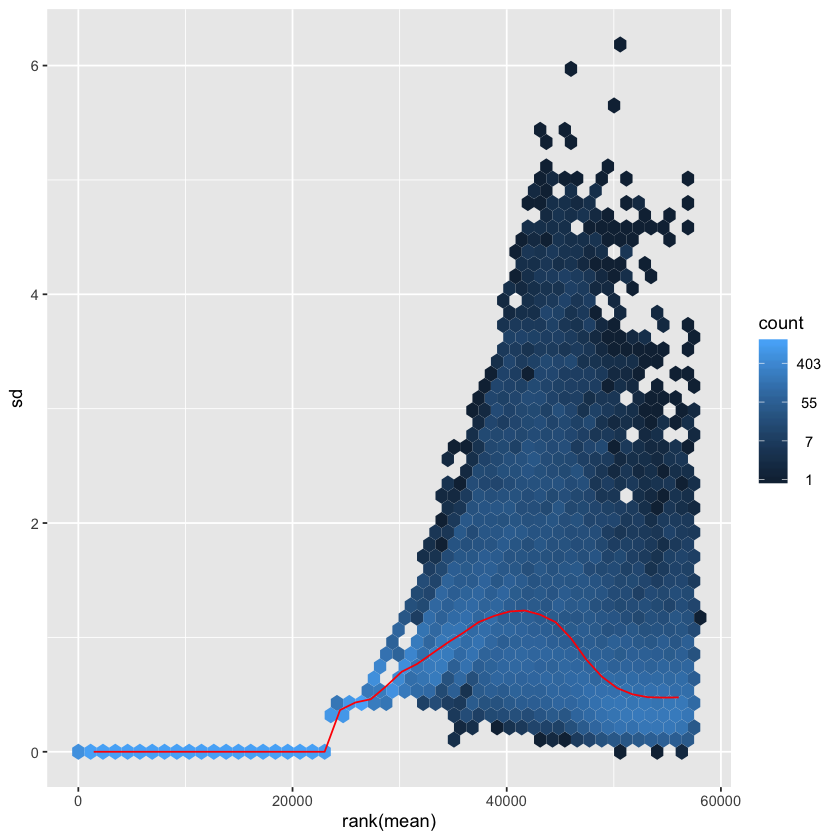

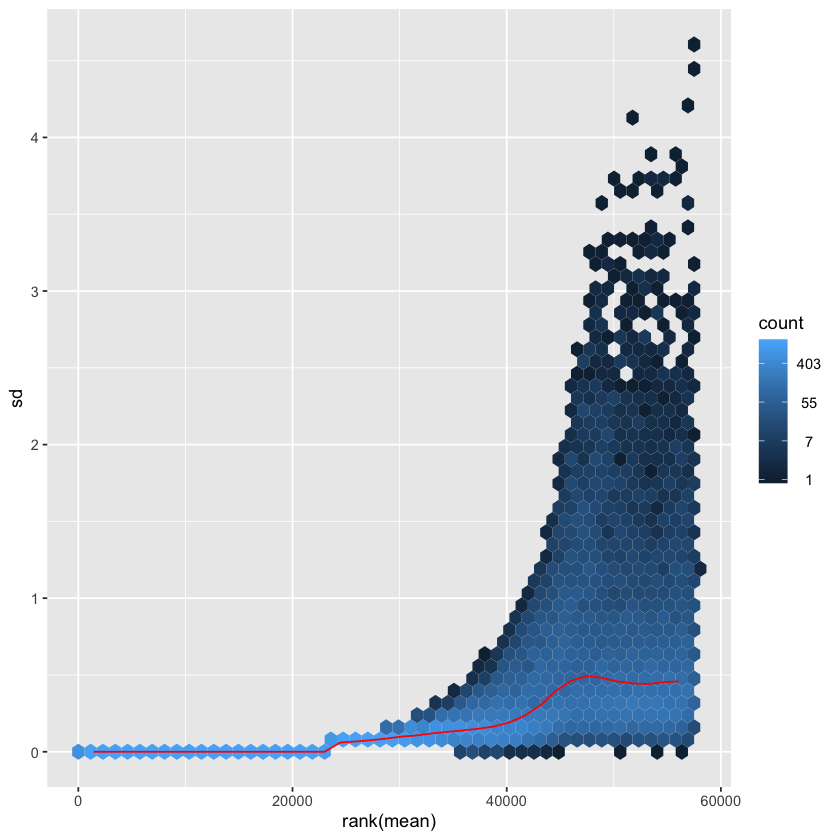

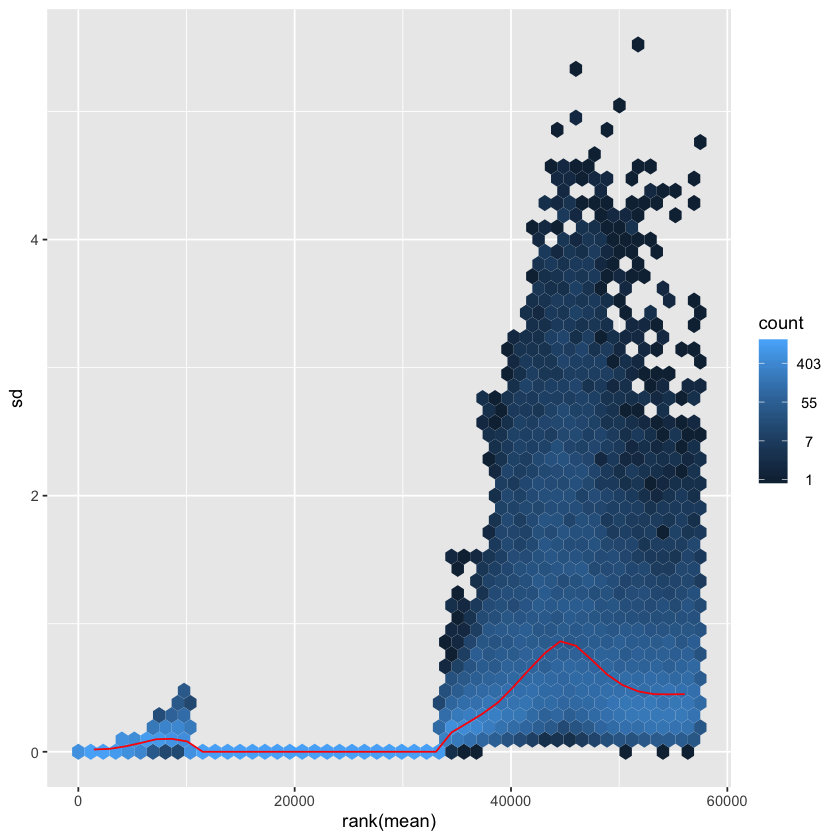

In [20]:
ntd=normTransform(dds)
vsd=vst(dds,blind=FALSE)
rld=rlog(dds,blind=FALSE)

meanSdPlot(assay(ntd))
meanSdPlot(assay(vsd))
meanSdPlot(assay(rld))

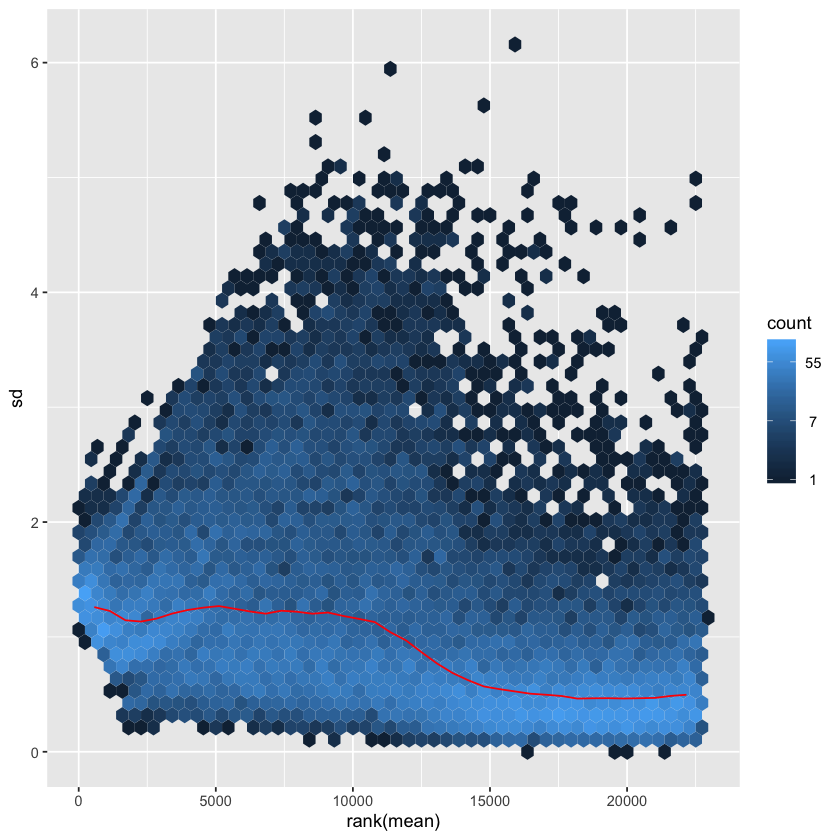

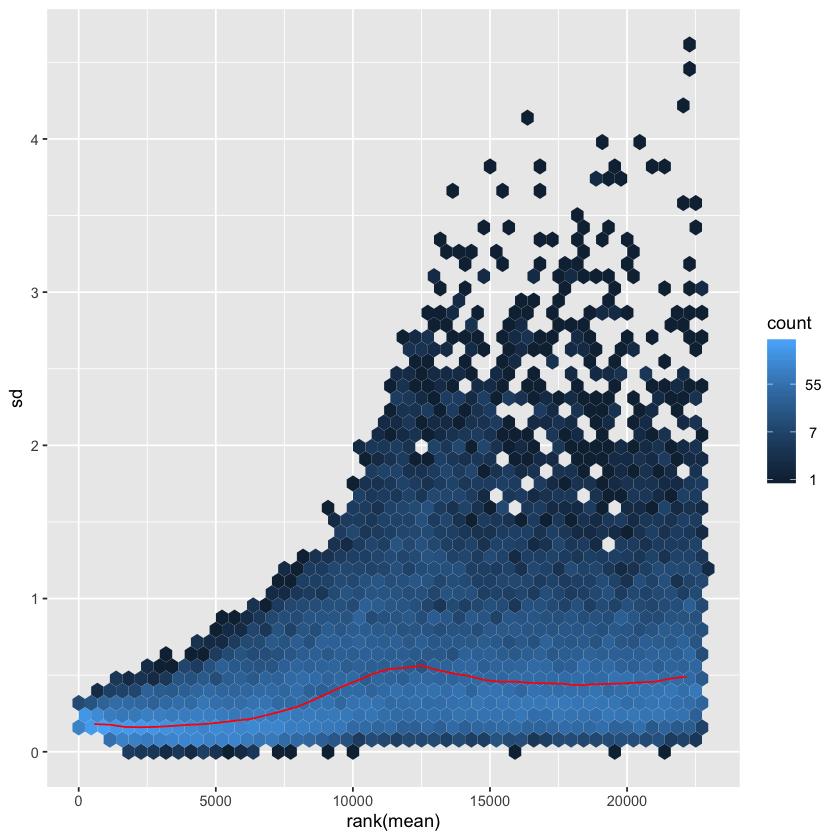

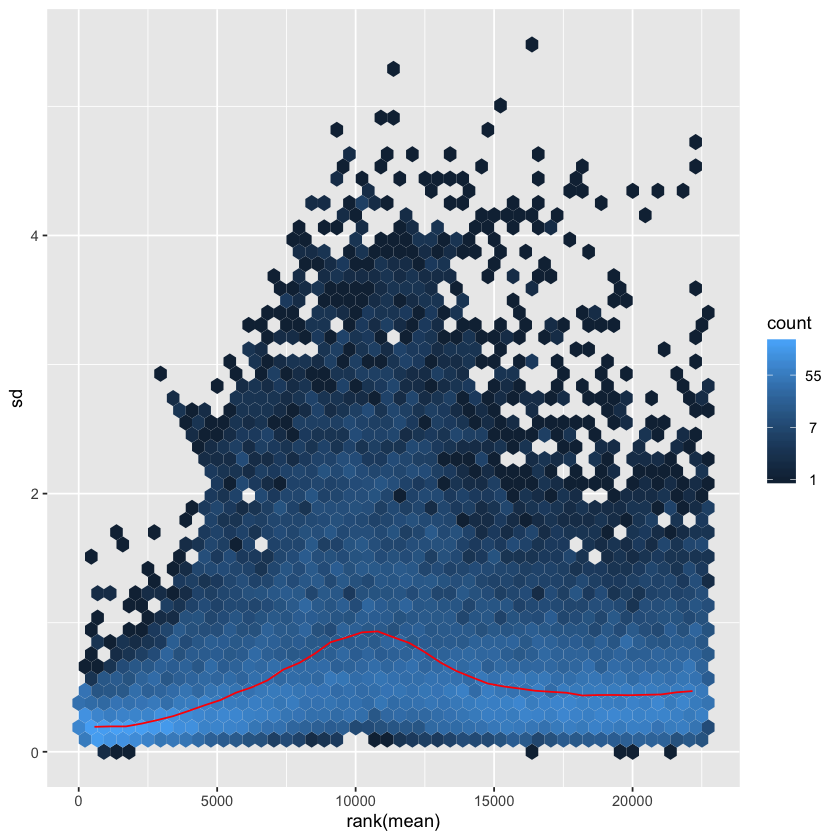

In [21]:
ntdA=normTransform(ddsA)
vsdA=vst(ddsA,blind=FALSE)
rldA=rlog(ddsA,blind=FALSE)

meanSdPlot(assay(ntdA))
meanSdPlot(assay(vsdA))
meanSdPlot(assay(rldA))

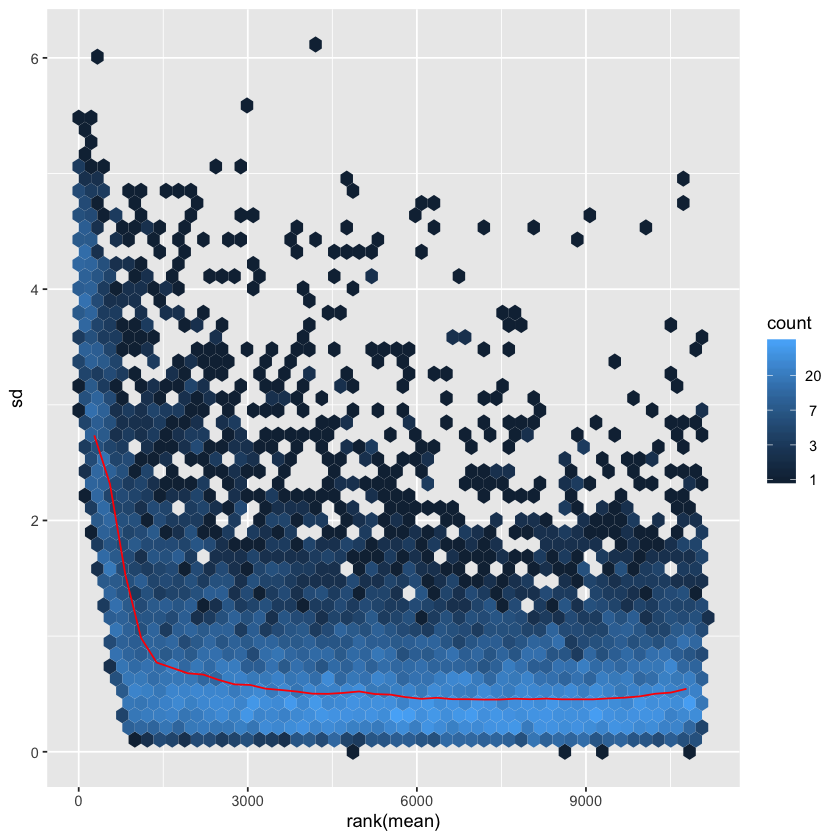

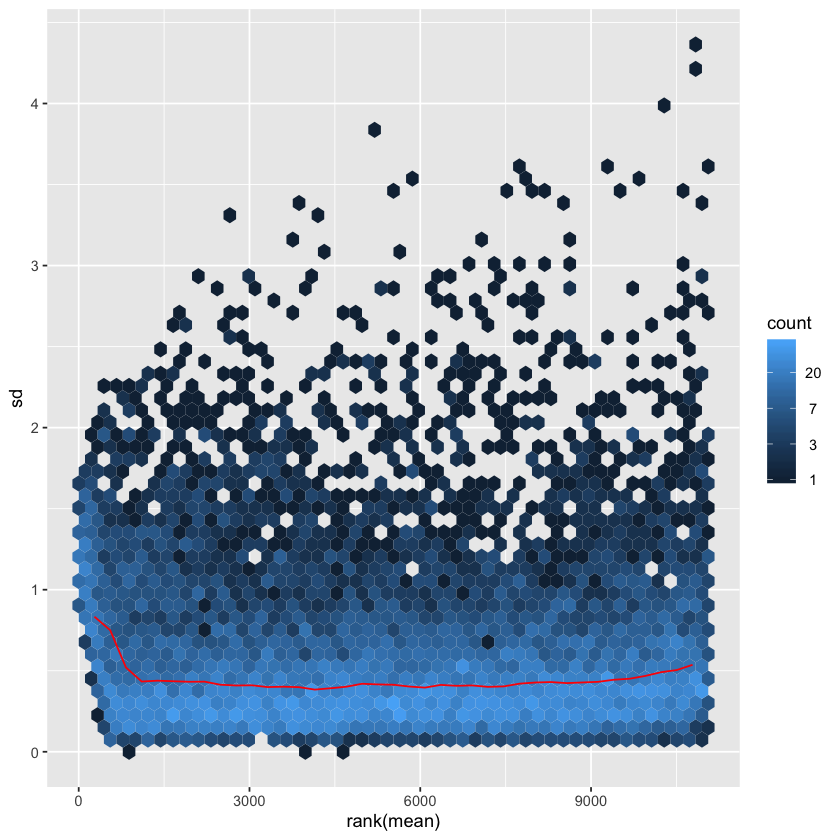

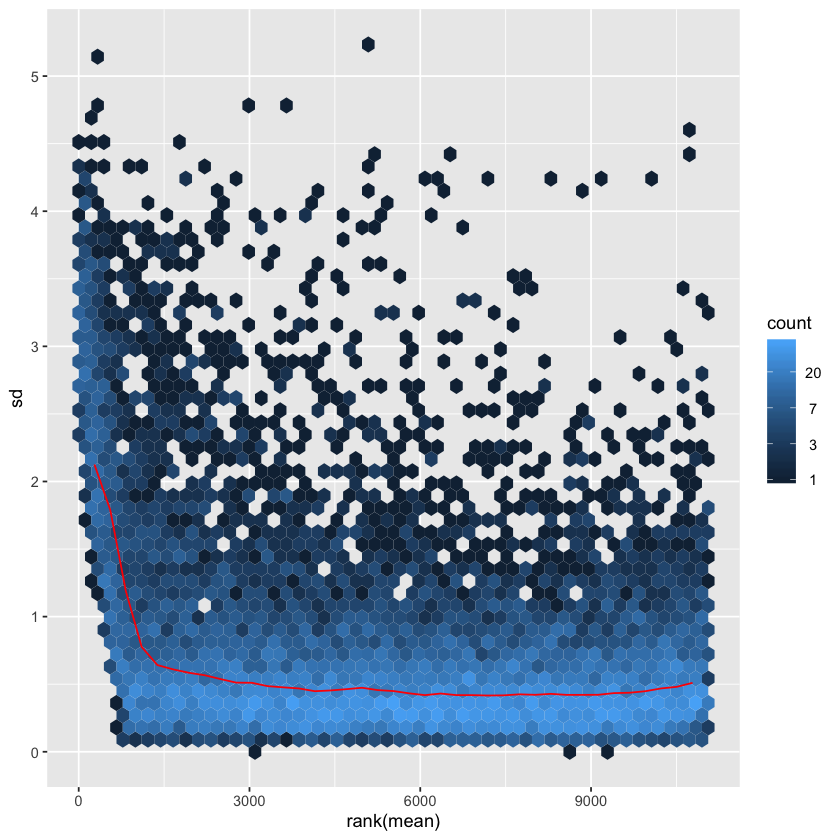

In [22]:
ntdB=normTransform(ddsB)
vsdB=vst(ddsB,blind=FALSE)
rldB=rlog(ddsB,blind=FALSE)

meanSdPlot(assay(ntdB))
meanSdPlot(assay(vsdB))
meanSdPlot(assay(rldB))

## 4.2. Heatmap

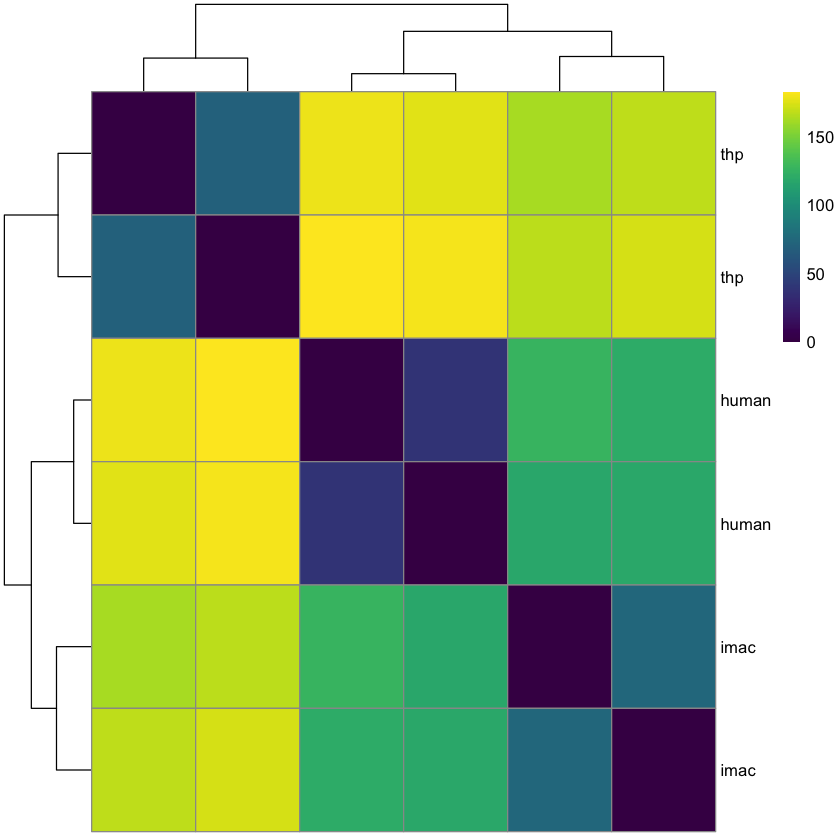

In [23]:
sampleDists=dist(t(assay(vsdA)))
sampleDistMatrix=as.matrix(sampleDists)
rownames(sampleDistMatrix)=vsdA$condition
colnames(sampleDistMatrix)=NULL
colors=viridis::viridis(200)
pheatmap(sampleDistMatrix,clustering_distance_rows=sampleDists,clustering_distance_cols=sampleDists,col=colors)

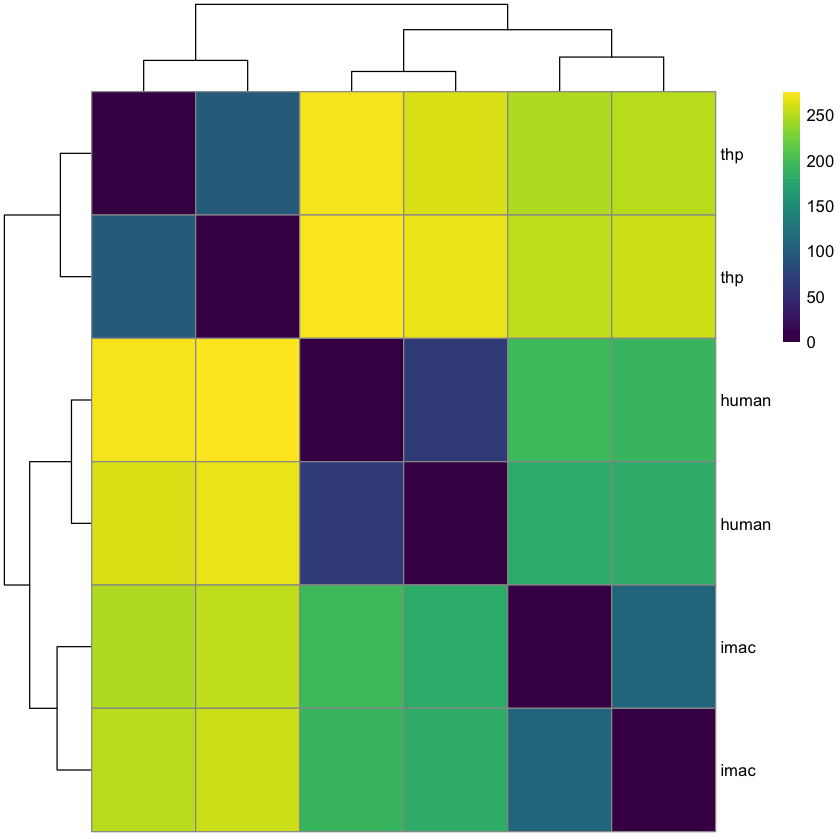

In [24]:
sampleDists=dist(t(assay(rldA)))
sampleDistMatrix=as.matrix(sampleDists)
rownames(sampleDistMatrix)=rldA$condition
colnames(sampleDistMatrix)=NULL
colors=viridis::viridis(200)
pheatmap(sampleDistMatrix,clustering_distance_rows=sampleDists,clustering_distance_cols=sampleDists,col=colors)

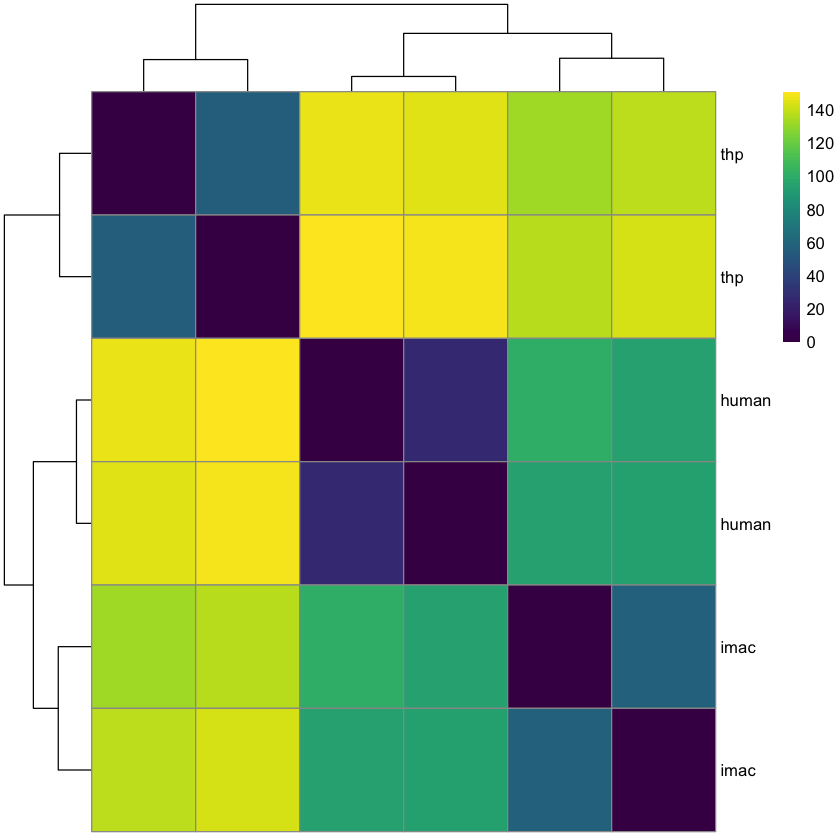

In [25]:
sampleDists=dist(t(assay(vsdB)))
sampleDistMatrix=as.matrix(sampleDists)
rownames(sampleDistMatrix)=vsdB$condition
colnames(sampleDistMatrix)=NULL
colors=viridis::viridis(200)
pheatmap(sampleDistMatrix,clustering_distance_rows=sampleDists,clustering_distance_cols=sampleDists,col=colors)

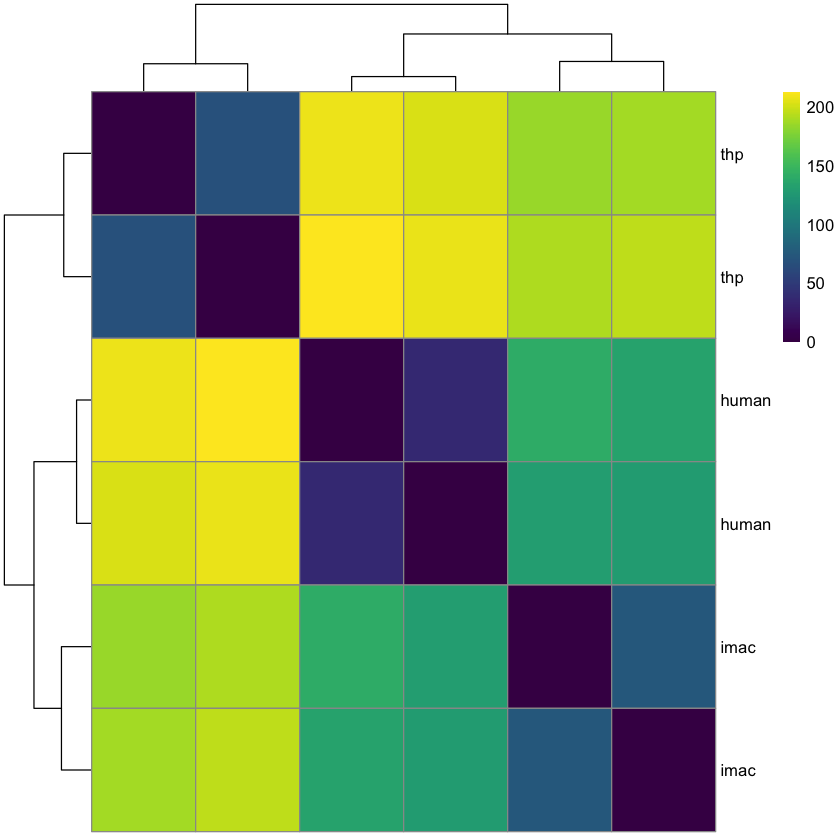

In [26]:
sampleDists=dist(t(assay(rldB)))
sampleDistMatrix=as.matrix(sampleDists)
rownames(sampleDistMatrix)=rldB$condition
colnames(sampleDistMatrix)=NULL
colors=viridis::viridis(200)
pheatmap(sampleDistMatrix,clustering_distance_rows=sampleDists,clustering_distance_cols=sampleDists,col=colors)

## 4.3. PCA

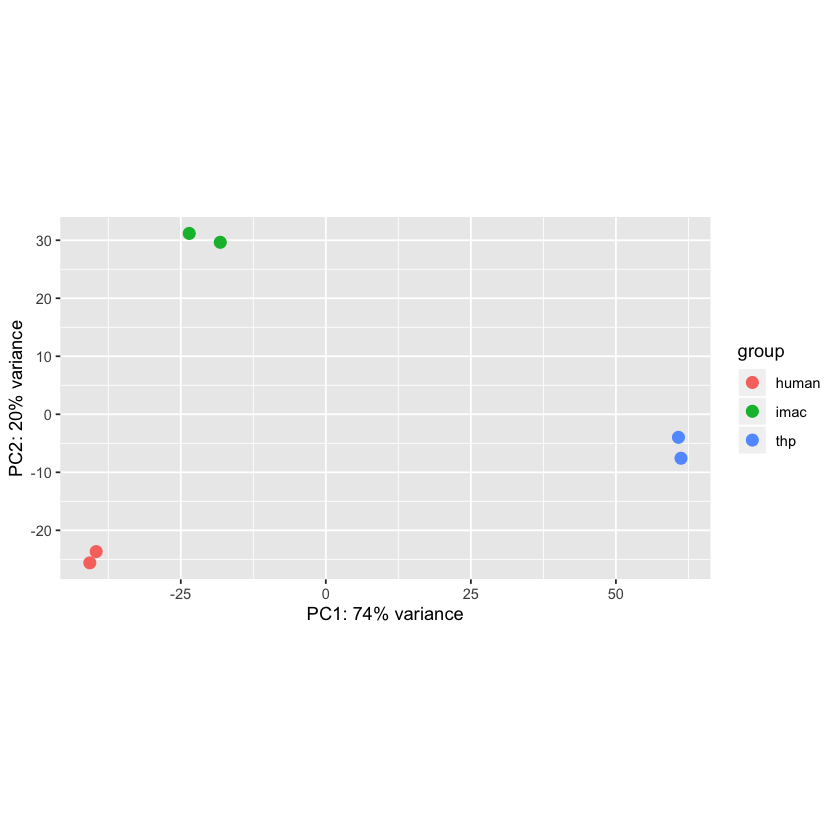

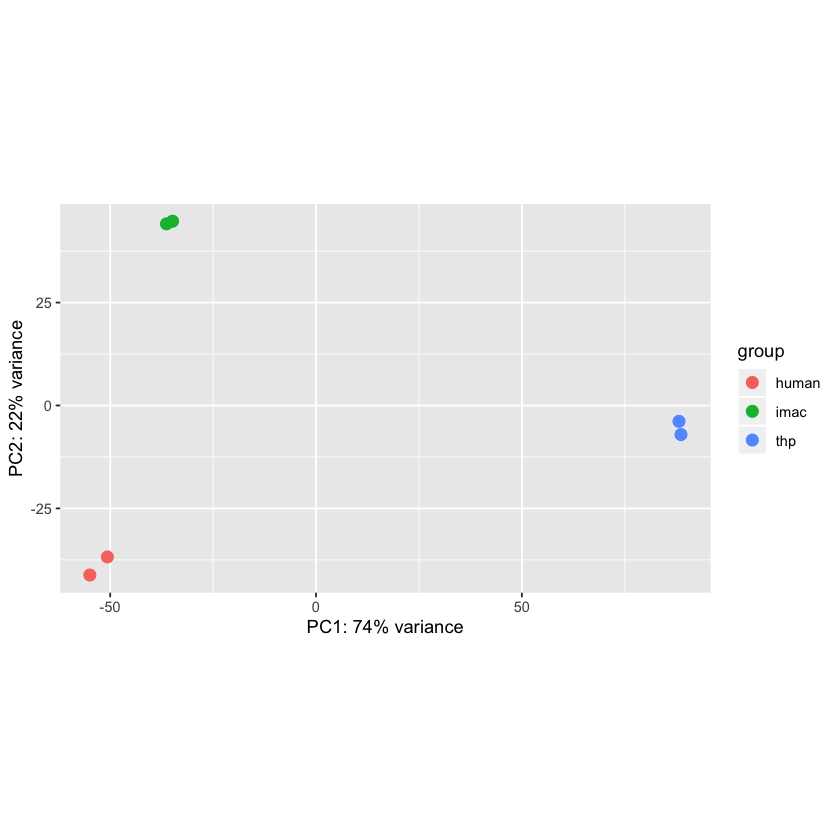

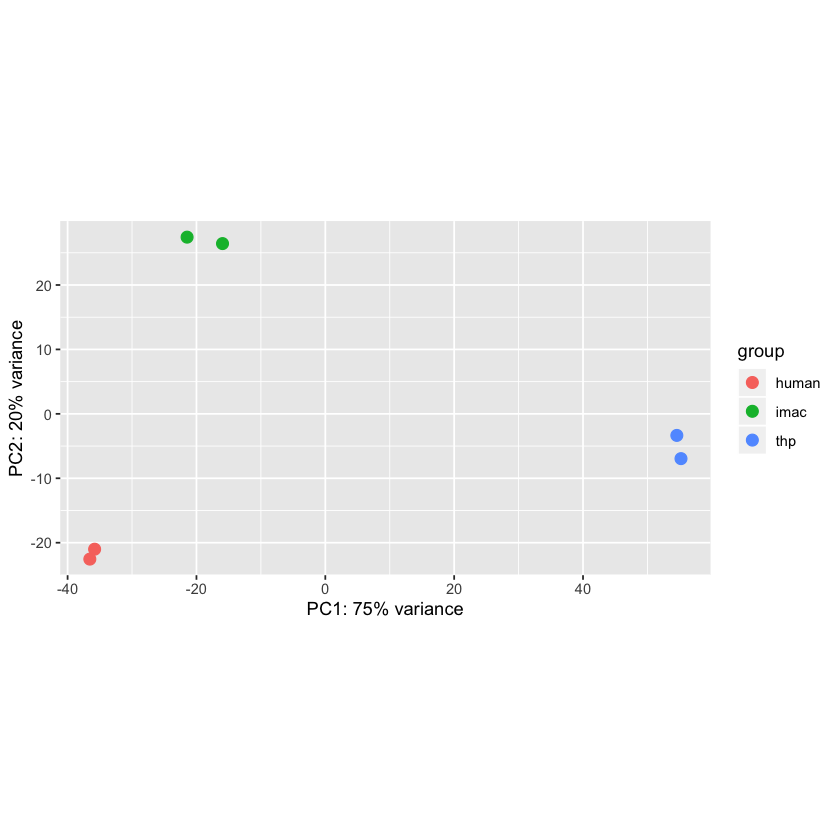

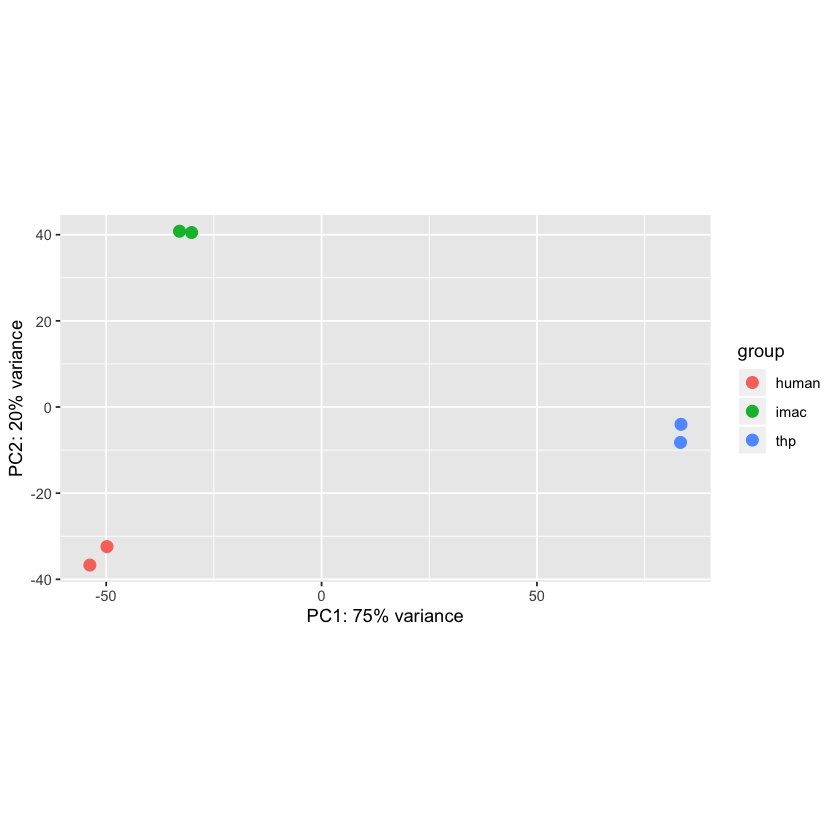

In [28]:
plotPCA(vsdA)
plotPCA(rldA)
plotPCA(vsdB)
plotPCA(rldB)

## 4.4. Gene clustering

In [30]:
topVarGenes <- head( order( rowVars( assay(rld) ), decreasing=TRUE ), 35 )

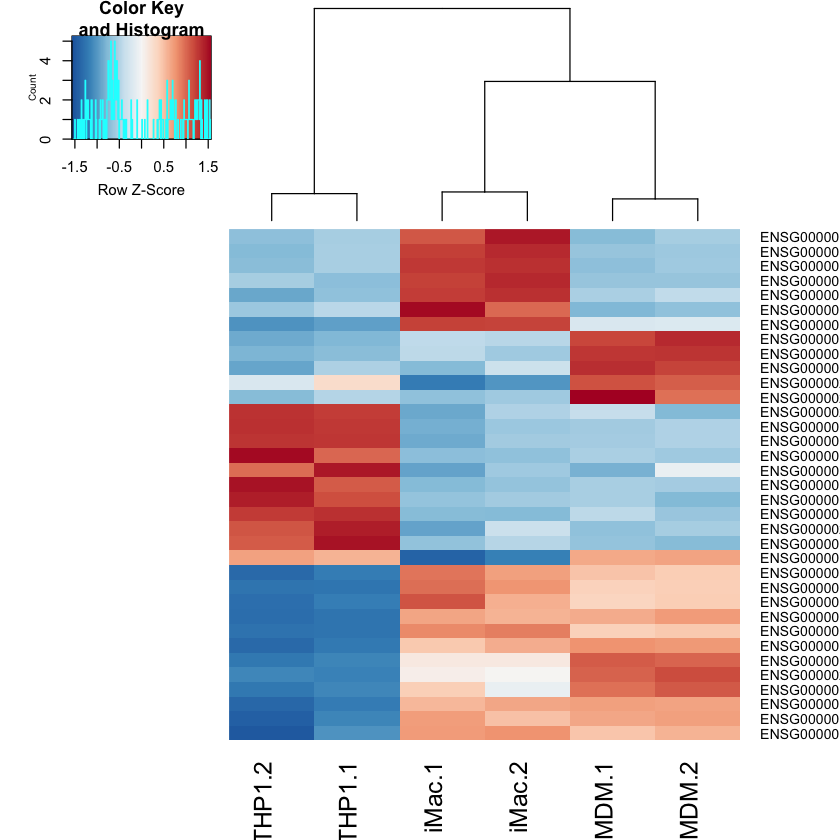

In [40]:
heatmap.2( assay(rld)[ topVarGenes, ], scale="row",
trace="none", dendrogram="column",
col = colorRampPalette( rev(brewer.pal(9, "RdBu")) )(255))

# 5. Export data towards final analysis

In [ ]:
write.csv(as.data.frame(assay(rld)),file=DESeqNormalizedCountsFile,quote=FALSE)

In [ ]:
# make a heatmap of the top 100? DETs
# make a heatmap of correlation of the different samples
# save data, and then follow in python the analysis.
# make sure if I get similar results using TPMs